<a href="https://colab.research.google.com/github/Joab-S/SimulacaoEstocasticaUFC/blob/main/Lista01_SimulacaoEstocastica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Considerando os códigos do gerador congruente, do Xorshift e do Mersènne Twister disponibilizados no repositório, elabore uma comparação visual entre estes métodos.


    a) Gere n = 1000 exemplos aleatórios de cada um deles.

    b) Faça um scatter plot onde x representa os valores gerados e y o valor anterior.

    c) Calcule as distâncias entre os valores gerados e repita o scatter plot onde x são as distâncias e y a distância anterior.

In [89]:
# XORSHIFT

def xorshift128(x = 123456789, y = 362436069, z = 521288629, w = 88675123):
    '''xorshift

    https://ja.wikipedia.org/wiki/Xorshift
    '''

    def _random():
        nonlocal x, y, z, w
        t = x ^ ((x << 11) & 0xFFFFFFFF)  # 32bit
        x, y, z = y, z, w
        w = (w ^ (w >> 19)) ^ (t ^ (t >> 8))
        return w

    return _random

In [90]:
# MERSENNE TWISTER

# coefficients for MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253


# make a arry to store the state of the generator
MT = [0 for i in range(n)]
index = n+1
lower_mask = 0x7FFFFFFF #(1 << r) - 1 // That is, the binary number of r 1's
upper_mask = 0x80000000 #lowest w bits of (not lower_mask)


# initialize the generator from a seed
def mt_seed(seed):
    # global index
    # index = n
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


# Extract a tempered value based on MT[index]
# calling twist() every n numbers
def extract_number():
    global index
    if index >= n:
        twist()
        index = 0

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# Generate the next n values from the series x_i
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA

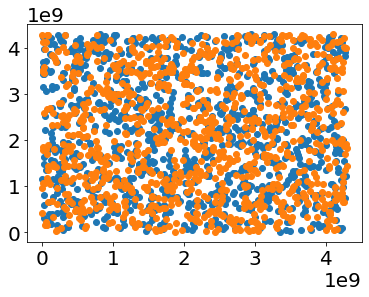

In [91]:
# item b)

r = xorshift128()
mt_seed(88675123)

x_Xor, y_Xor = [], []
x_Mer, y_Mer = [], []

for i in range(1000):
  x_Mer.append(extract_number())
  y_Mer.append(extract_number())

  x_Xor.append(r())
  y_Xor.append(r())

import matplotlib.pyplot as plt

plt.scatter(x_Xor, y_Xor)
plt.scatter(x_Mer, y_Mer)
plt.show()

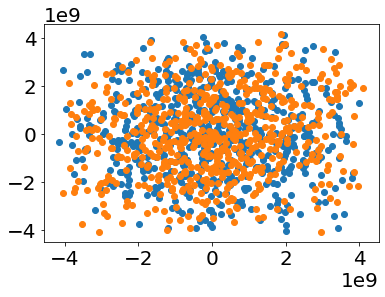

In [92]:
# item b)

r = xorshift128()
mt_seed(88675123)

x_Xor, y_Xor = [], []
x_Mer, y_Mer = [], []

for i in range(1000):
  x_Mer.append(extract_number())
  y_Mer.append(extract_number())

  x_Xor.append(r())
  y_Xor.append(r())

distanceXmer, distanceYmer = [], []
distanceXxor, distanceYxor = [], []

for i in range(n):
  if i != 0:  
    distanceXmer.append(x_Mer[i] - x_Mer[i-1])
    distanceYmer.append(y_Mer[i] - y_Mer[i-1])
    distanceXxor.append(x_Xor[i] - x_Xor[i-1])
    distanceYxor.append(y_Xor[i] - y_Xor[i-1])


import matplotlib.pyplot as plt

plt.scatter(distanceXxor, distanceYxor)
plt.scatter(distanceXmer, distanceYmer)
plt.show()

#2. Um interesse fundamental sobre os geradores de números aleatórios é estabelecer medidas de variabilidade das sequências geradas.

    a) Elabore um método de geração de números aleatórios linear congruente para números de 8 bits (0 a 255).

    b) Verifique o período, amplitude e variância do método proposto para a geração de 50, 100, 200 e 300 valores.

    c) Verifique o período, amplitude e variância das distâncias entre os valores gerados pelo método.

    d) Utilize o gerador acoplado na linguagem de programação para fazer os mesmos testes.

  Como eles se comparam com o gerador proposto?

In [93]:
# item a)

def lcg(r = 88675123, a = 1140671485, c = 128201163, m = 2**24):
    def _random():
        nonlocal a, c, m, r
        r = (a*r + c) % m
        return r

    return _random

In [94]:
# item b)

nValues = [50, 100, 200, 300]

for n in nValues:
  print("PARA N =", n)
  r = lcg()

  lista = []
  for i in range(n):
      #print(i, ": ", r())
      lista.append(r())

  xBarra = (sum(lista)/n)
  print("amplitude:", max(lista), "-", min(lista), "=", max(lista) - min(lista))

  var, soma = 0, 0
  for i in range(n):
    soma = soma + (lista[i] - xBarra)**2
  var = soma/n
  print("Variância =", var)

  print()

PARA N = 50
amplitude: 16330664 - 760058 = 15570606
Variância = 16377775190235.23

PARA N = 100
amplitude: 16384627 - 38155 = 16346472
Variância = 21590691946367.516

PARA N = 200
amplitude: 16384627 - 24584 = 16360043
Variância = 22376310131088.227

PARA N = 300
amplitude: 16489980 - 24584 = 16465396
Variância = 23602475643529.367



In [95]:
# item c)

nValues = [50, 100, 200, 300]

for n in nValues:
  print("PARA N =", n)
  r = lcg()

  lista = []
  for i in range(n):
    #print(i, ": ", r())
    lista.append(r())

  distance = []

  for i in range(n):
    if i != 0:  
        novo_valor = lista[i] - lista[i-1]
        distance.append(novo_valor)

  distanceBarra = (sum(distance)/n)
  print("amplitude:", max(distance), "-", min(distance), "=", max(distance) - min(distance))

  var, soma = 0, 0
  for i in range(n-1):
    soma = soma + (distance[i] - distanceBarra)**2
  var = soma/n
  print("Variância =", var)

  print()

PARA N = 50
amplitude: 10119127 - -11577505 = 21696632
Variância = 26081613852401.52

PARA N = 100
amplitude: 12834843 - -16141313 = 28976156
Variância = 45558258260316.94

PARA N = 200
amplitude: 13131055 - -16141313 = 29272368
Variância = 43726387300229.03

PARA N = 300
amplitude: 15019719 - -16141313 = 31161032
Variância = 44695259976149.27

